In [8]:
import pandas as pd
import numpy as np
data=pd.read_csv('E:/Data Science/OBISIP/Datasets/spam.csv',encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
data.info()
data.rename(columns={'v1':'message_type','v2':'message'},inplace=True)
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,message_type,message
372,ham,I'm going for bath will msg you next &lt;#&gt...
1832,ham,What time is ur flight tmr?
2001,ham,Idea will soon get converted to live:)
3420,spam,Welcome! Please reply with your AGE and GENDER...
4335,ham,"Fyi I'm taking a quick shower, be at epsilon i..."


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data['message_type']=encoder.fit_transform(data['message_type'])
data['message_type'].sample(5)

4980    0
4418    0
1124    0
2194    0
3195    0
Name: message_type, dtype: int32

In [24]:
data[data['message_type']==1]

,message_type,message,num_characters,num_words,num_sentences
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1


In [12]:
data.isnull().sum()
data.duplicated().sum()
data=data.drop_duplicates()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

data['message_type'].value_counts()

ham     4516
spam     653
Name: message_type, dtype: int64

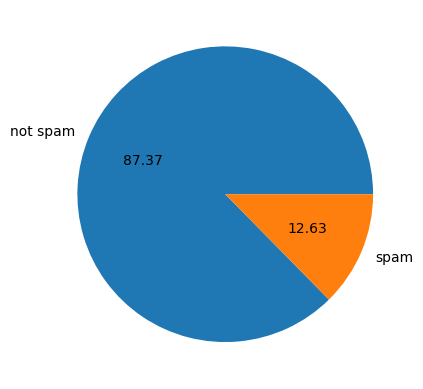

In [14]:
plt.pie(data['message_type'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [3]:
#Natural language toolkit
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
data['num_characters']=data['message'].apply(len)
data.head()

,message_type,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
#For no of characters
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [18]:
#For no of words
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.sample(5)

,message_type,message,num_characters,num_words
2594,ham,"ThatÛ÷s the thing with apes, u can fight to t...",126,30
2370,ham,"That day Ì_ say Ì_ cut ur hair at paragon, is ...",102,27
4634,ham,How come i din c Ì_... Yup i cut my hair...,43,13
3680,ham,LOL what happens in Vegas stays in vegas,40,8
1771,ham,Watching tv now. I got new job :),33,10


In [19]:
#for no of sentences
data['num_sentences']=data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
data[data['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
data[data['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

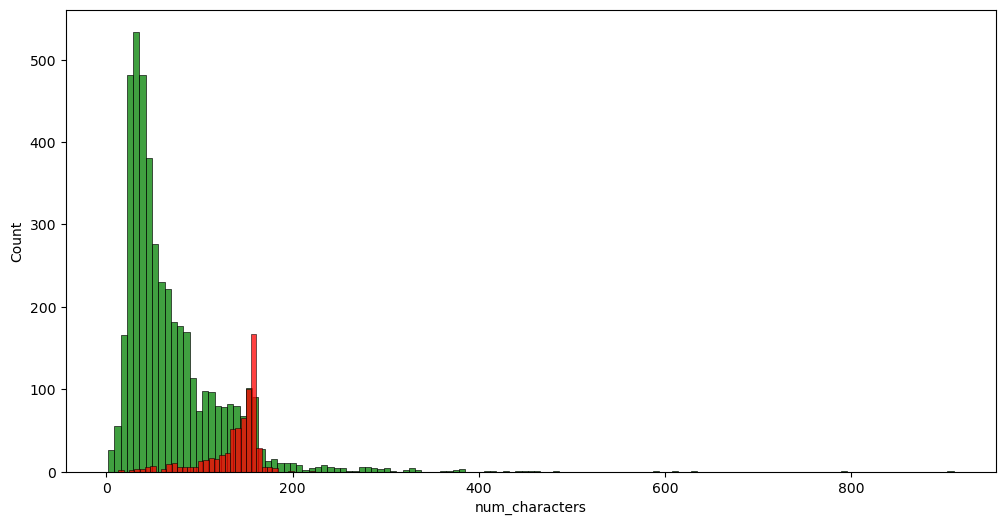

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['message_type']==0]['num_characters'],color='green')
sns.histplot(data[data['message_type']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

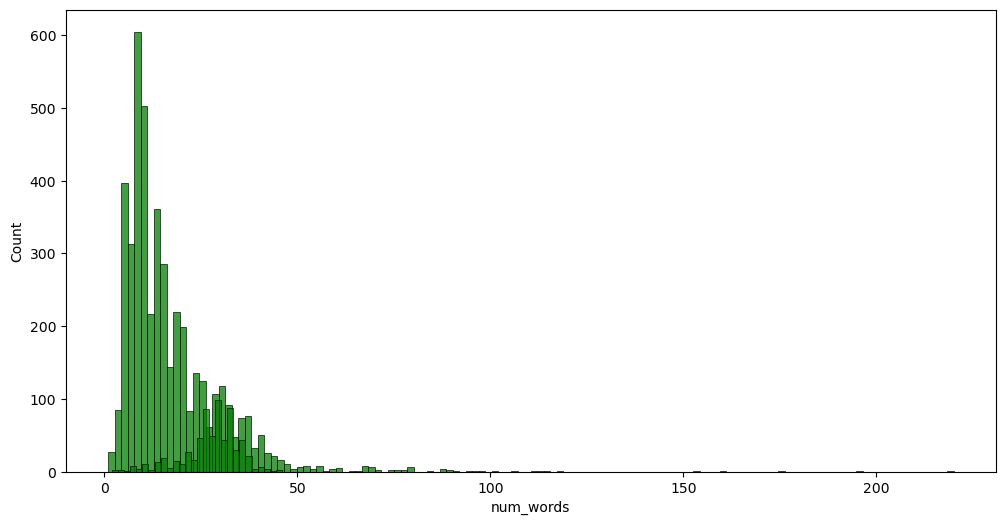

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['message_type']==0]['num_words'],color='green')
sns.histplot(data[data['message_type']==1]['num_words'],color='green')


C:\Users\shree\AppData\Local\Temp\ipykernel_11620\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

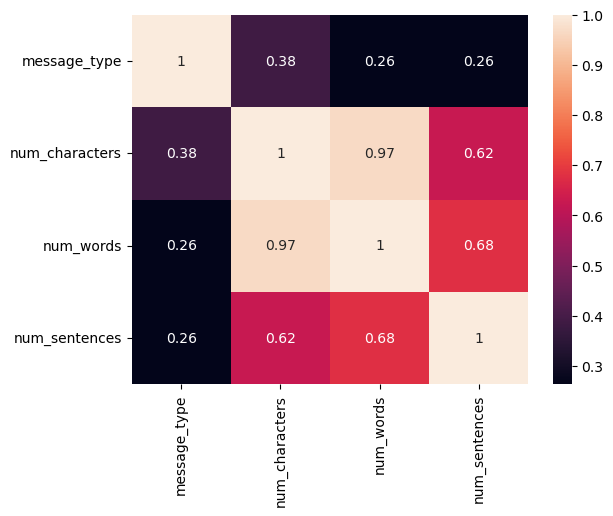

In [30]:
sns.heatmap(data.corr(),annot=True)

In [31]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)

In [32]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [60]:
data['transformed_msg']=data['message'].apply(text_transform)

In [37]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [39]:
spam_wc=wc.generate(data[data['message_type']==1]['transformed_msg'].str.cat(sep=""))

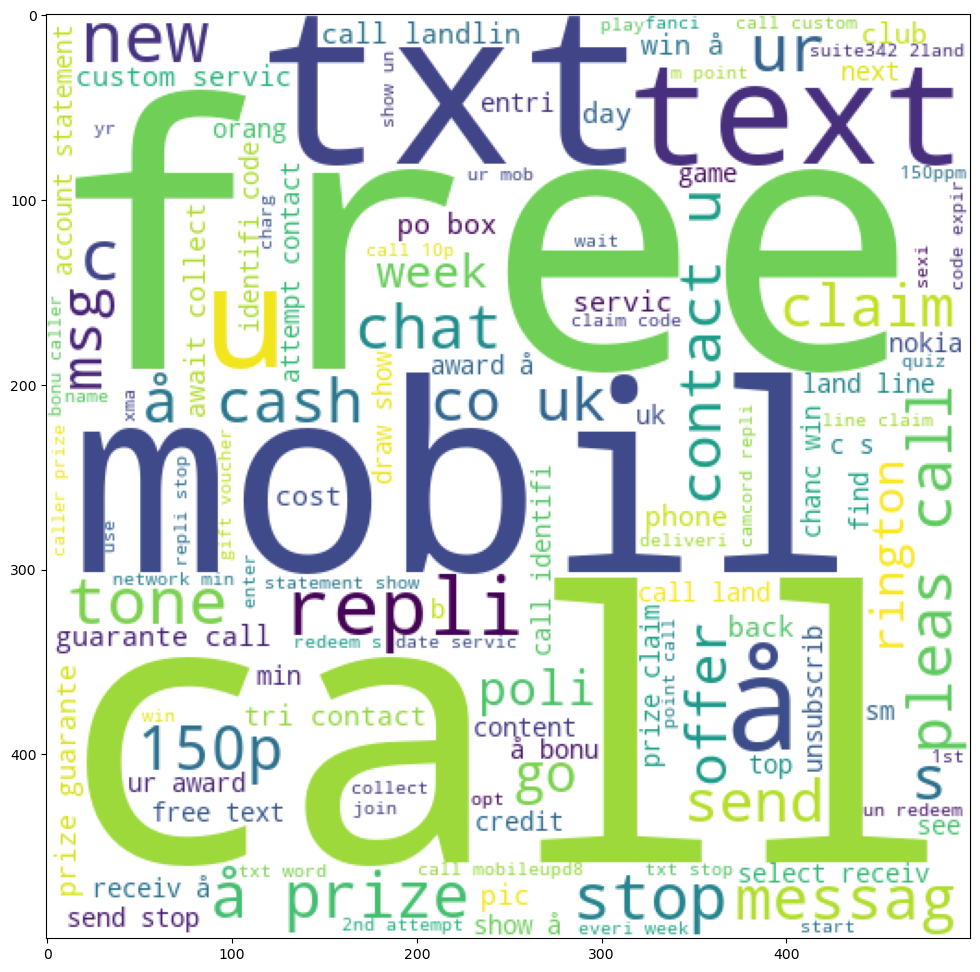

In [40]:
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

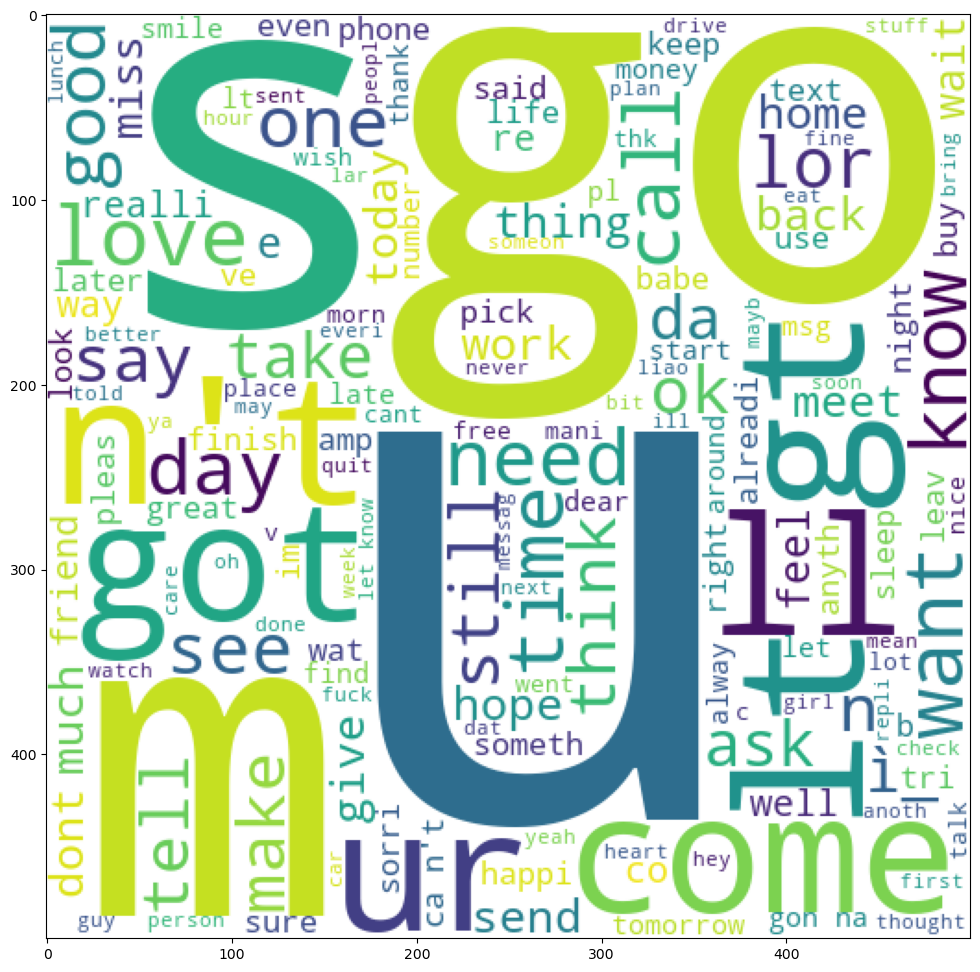

In [42]:
ham_wc=wc.generate(data[data['message_type']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

In [44]:
spam_corpus=[]
for msg in data[data['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
plt.figure(figsize=(18,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1800x1200 with 0 Axes>

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [53]:
tfidf= TfidfVectorizer(max_features=3000)

In [62]:
X= tfidf.fit_transform(data['transformed_msg']).toarray()
y=data['message_type'].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [64]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143


In [65]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is 1.0


In [66]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.988394584139265
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 12 126]]
Precision score of the Bernoulli NB is 1.0
